# Project: Machine Learning

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive if you haven't already. This will be the repository for all your completed assignment and project files, aiding you in keeping your work organized and accessible.
   
3. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Student Identity

In [322]:
# @title #### Student Identity
student_id = "REAGRZQD" # @param {type:"string"}
name = "Theofilus Arifin" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1wxxcv6NGH-FGLZgkvTGo5_t6A68GHpbo?usp=sharing"  # @param {type:"string"}

assignment_id = "00_ml_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

## Project Description

In this Machine Learning Project, you will create your own supervised Machine Learning (ML) model. We will use the full FIFA21 Dataset and we will identify players that are above average.

We will use the column "Overall" with a treshold of 75 to define players that are 'Valuable'. This will become our target output which we need for a supervised ML model. Because we use the "Overall" as our target output, you cannot use "Overall" in your features, this will be explained further below.

This project will provide a comprehensive overview of your abilities in machine learning, from understanding the problem, choosing the right model, training, and optimizing it.

## Grading Criteria

Your score will be awarded based on the following criteria:
* 100: The model has an accuracy of more than 80% and an F1 score of more than 85%. This model is excellent and demonstrates a strong understanding of the task.
* 90: The model has an accuracy of more than 75% and an F1 score of more than 80%. This model is very good, with some room for improvement.
* 80: The model has an accuracy of more than 70% and an F1 score between 70% and 80%. This model is fairly good but needs improvement in balancing precision and recall.
* 70: The model has an accuracy of more than 65% and an F1 score between 60% and 70%. This model is below average and needs significant improvement.
* 60 or below: The model has an accuracy of less than 65% or an F1 score of less than 60%, or the student did not submit the accuracy and F1 score. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Happy modeling!

>Note: If you get the accuracy of 100% and F1 score of 100%, while it may earn you good grades, it's an indication of overfitting.

In [323]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

In [324]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [325]:
%cd '/content/drive/MyDrive/Skill Academy/Project/#2 Machine Learning'
HOME = os.getcwd()
HOME

/content/drive/MyDrive/Skill Academy/Project/#2 Machine Learning


'/content/drive/MyDrive/Skill Academy/Project/#2 Machine Learning'

## Load the dataset and clean it

In this task, you will prepare and load your dataset. You need to download the full FIFA 21 Dataset from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv).

>Note: Make sure you download FIFA 21 dataset.
>
>![FIFA21 Dataset](https://storage.googleapis.com/rg-ai-bootcamp/projects/fifa21_dataset-min.png)

After you download the dataset, you will then import the dataset then you will clean the data. For example there may be some empty cell in the dataset which you need to fill. Maybe there are also data that you need to convert to numeric value for analysis. Identify the data that is incomplete and fix them.

In the code block below, you can use the comments to guide you on what to do.

In [326]:
# Load your data
df = pd.read_csv('FIFA21_official_data.csv')
df.shape

(17108, 65)

In [327]:
df.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0


Dataset terdiri atas 65 kolom feature dan 17108 row observasi

In [328]:
# Check for null values in each column
null_columns = df.columns[df.isnull().any()]
print("Banyak kolom dengan data kosong : ", len(null_columns))

# Display only the columns with null values and their respective counts
df_null_columns = df[null_columns]
null_counts = df_null_columns.isnull().sum()
print(null_counts)

Banyak kolom dengan data kosong :  21
Club                      325
Body Type                  25
Real Face                  25
Position                   20
Jersey Number              20
Joined                   1449
Loaned From             16186
Contract Valid Until      496
Volleys                    39
Curve                      39
Agility                    39
Balance                    39
Jumping                    39
Interceptions               3
Positioning                 3
Vision                     39
Composure                 287
Marking                 16166
SlidingTackle              39
Release Clause           1629
DefensiveAwareness        942
dtype: int64


Dari 65 Kolom feature terdapat 21 feature yang memiliki data kosong, fitur-fitur ini perlu diidentifikasi lebih lanjut apakah akan diatas dengan data imputation atau drop na. Namun terdapat dua feature yang telalu banyak memiliki data kosong yang itu Loaned From dan Marking. Kedua fitur ini akan di drop keseluruhan karena memiliki data kosong yang terlalu banyak

In [329]:
df = df.drop(columns=['Loaned From', 'Marking'])
df_null_columns = df_null_columns.drop(columns=['Loaned From', 'Marking'])

In [330]:
# Split object and numeric column to describe
null_object_columns = df_null_columns.select_dtypes(include=['object']).columns
null_numeric_columns = df_null_columns.select_dtypes(include=['int', 'float']).columns

# Create separate DataFrames for object and numeric data type columns
null_object_df = df[null_object_columns]
null_numeric_df = df[null_numeric_columns]

In [331]:
null_numeric_df.describe()

,Jersey Number,Volleys,Curve,Agility,Balance,Jumping,Interceptions,Positioning,Vision,Composure,SlidingTackle,DefensiveAwareness
count,17088.000000,17069.000000,17069.000000,17069.000000,17069.000000,17069.000000,17105.000000,17105.000000,17069.000000,16821.000000,17069.000000,16166.000000
mean,20.756145,44.729217,49.280919,64.437343,64.630148,64.961216,46.818065,52.109851,55.271076,59.634088,45.933271,47.014475
std,17.194590,17.753640,18.225079,14.384090,14.017691,11.920112,20.924233,19.172977,13.716736,11.912131,21.213315,20.152543
min,1.000000,4.000000,4.000000,14.000000,17.000000,22.000000,4.000000,2.000000,10.000000,12.000000,6.000000,3.000000
25%,9.000000,32.000000,37.000000,57.000000,57.000000,58.000000,26.000000,43.000000,46.000000,52.000000,25.000000,29.000000
50%,18.000000,46.000000,51.000000,67.000000,67.000000,66.000000,52.000000,57.000000,57.000000,60.000000,52.000000,52.000000
75%,27.000000,58.000000,63.000000,75.000000,74.000000,73.000000,65.000000,66.000000,65.000000,68.000000,64.000000,64.000000
max,99.000000,90.000000,94.000000,96.000000,97.000000,95.000000,95.000000,96.000000,95.000000,96.000000,95.000000,94.000000


Dapat dilihat rata-rata dan quartil 2 pada tiap kolom tidak terpaut sangat jauh, maka dari itu data imputation menggunakan mean dapat dilakukan karena data tidak terlalu skewed

In [332]:
# Lakukan DropNA pada kolom tipe string yang memiliki data kosong
df = df.dropna(subset=null_object_columns)

# Lakukan Data Imputation menggunakan mean pada kolom tipe numeric yang memiliki data kosong
for column in null_numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [333]:
df.isnull().sum()

ID                     0
Name                   0
Age                    0
Photo                  0
Nationality            0
                      ..
GKReflexes             0
Best Position          0
Best Overall Rating    0
Release Clause         0
DefensiveAwareness     0
Length: 63, dtype: int64

### Preprocessing Feature

#### Currency

In [334]:
currency_feature = ['Value', 'Wage', 'Release Clause']

def preprocess_currency(currency_str):
    currency_str = currency_str.replace('€', '')  # Remove € sign
    currency_value = 0
    if currency_str.endswith('M'):
        currency_str = currency_str.replace('M', '')  # Remove 'M'
        currency_value = float(currency_str) * 10**6  # Convert to millions
    elif currency_str.endswith('K'):
        currency_str = currency_str.replace('K', '')  # Remove 'K'
        currency_value = float(currency_str) * 10**3  # Convert to thousands
    return currency_value

for i in currency_feature:
    df[i] = df[i].apply(lambda x: preprocess_currency(x))

#### Weight

In [335]:
def preprocess_weight(weight):
  preprocessed_weight = weight.replace('lbs', '')
  preprocessed_weight = int(preprocessed_weight)
  return preprocessed_weight

df['Weight'] = df['Weight'].apply(lambda x: preprocess_weight(x))
df['Weight'].head(3)

0    190
1    154
2    152
Name: Weight, dtype: int64

#### Height



In [336]:
def preprocess_height(height):
  feet, inches = map(int, height.split("'"))
  total_inches = feet * 12 + inches
  cm = total_inches * 2.54
  return cm

df['Height'] = df['Height'].apply(lambda x: preprocess_height(x))
df['Height'].head(3)

0    182.88
1    180.34
2    177.80
Name: Height, dtype: float64

#### Feature Selection

In [337]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [338]:
feature_to_drop = ['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Best Position']

df.drop(columns=feature_to_drop, inplace=True)
df.head(3)

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,Release Clause,DefensiveAwareness
0,33,87,87,31500000.0,115000.0,2316,5.0,4.0,3.0,182.88,...,45.0,38.0,27.0,25.0,31.0,33.0,37.0,87.0,64600000.0,57.0
1,29,91,91,87000000.0,370000.0,2304,4.0,5.0,4.0,180.34,...,65.0,53.0,15.0,13.0,5.0,10.0,13.0,91.0,161000000.0,68.0
2,25,87,90,63000000.0,195000.0,2303,2.0,4.0,4.0,177.80,...,67.0,55.0,12.0,14.0,15.0,8.0,14.0,88.0,124400000.0,72.0


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15318 entries, 0 to 17107
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15318 non-null  int64  
 1   Overall                   15318 non-null  int64  
 2   Potential                 15318 non-null  int64  
 3   Value                     15318 non-null  float64
 4   Wage                      15318 non-null  float64
 5   Special                   15318 non-null  int64  
 6   International Reputation  15318 non-null  float64
 7   Weak Foot                 15318 non-null  float64
 8   Skill Moves               15318 non-null  float64
 9   Height                    15318 non-null  float64
 10  Weight                    15318 non-null  int64  
 11  Crossing                  15318 non-null  float64
 12  Finishing                 15318 non-null  float64
 13  HeadingAccuracy           15318 non-null  float64
 14  ShortP

In [340]:
df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,Release Clause,DefensiveAwareness
count,15318.000000,15318.000000,15318.000000,1.531800e+04,15318.000000,15318.000000,15318.000000,15318.000000,15318.000000,15318.000000,...,15318.000000,15318.000000,15318.000000,15318.000000,15318.000000,15318.000000,15318.000000,15318.000000,1.531800e+04,15318.000000
mean,24.927797,66.609022,72.461614,2.651604e+06,10472.385429,1622.726270,1.133503,2.976041,2.442486,181.230277,...,48.139966,45.975715,15.660922,15.500588,15.360099,15.513318,15.745789,67.605170,5.016503e+06,47.056458
std,4.839826,7.062187,5.735008,5.565238e+06,21635.353412,264.492331,0.429535,0.675744,0.775297,6.878245,...,21.480835,21.149723,16.865375,16.158789,15.807440,16.381902,17.173205,6.825979,1.074190e+07,19.832656
min,16.000000,46.000000,46.000000,3.000000e+03,0.000000,731.000000,1.000000,1.000000,1.000000,154.940000,...,5.000000,6.000000,2.000000,2.000000,1.000000,2.000000,2.000000,45.000000,5.000000e+03,3.000000
25%,21.000000,62.000000,69.000000,3.750000e+05,1000.000000,1478.000000,1.000000,3.000000,2.000000,175.260000,...,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,63.000000,6.892500e+05,30.000000
50%,24.000000,67.000000,72.000000,8.000000e+05,3000.000000,1651.000000,1.000000,3.000000,2.000000,180.340000,...,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,1.500000e+06,50.000000
75%,28.000000,71.000000,76.000000,2.500000e+06,11000.000000,1807.000000,1.000000,3.000000,3.000000,185.420000,...,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,72.000000,4.500000e+06,64.000000
max,47.000000,93.000000,95.000000,1.055000e+08,560000.000000,2316.000000,5.000000,5.000000,5.000000,205.740000,...,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,93.000000,2.031000e+08,94.000000


Seluruh fitur sudah dalam bentuk numerik dan dapat dimasukkan ke model

## Build and Train your model

In this task you will analyze the data and select the features that is best at predicting if the Player is a 'Valuable' player or not.

The first step is to **define the target output** that you will use for training. Here's an example of how to create a target output:
- `df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 50 else 0) #Define the OK Player using treshold of 50.`

Next you will **identify the features** that will best predict a 'Valuable' player. You are required to **submit the features you selected** in the Submission section below. Because we use the "Overall" as our target output, the use of "Overall" in your features is not allowed. You will automatically get 0 if you submit "Overall" in your features.

Once you identify the features, you will then **split the data** into Training set and Testing/Validation set.

Depending on the features you selected, **you may need to scale the features**.

Now you will **train your model, choose the algorithm** you are going to use carefully to make sure it gives the best result.

Once you have trained your model, you need to test the model effectiveness. **Make predictions against your Testing/Validation set** and evaluate your model. You are required to **submit the Accuracy Score and F1 score** in the Submission section below.

In the code block below, you can use the comments to guide you on what to do.

We have also provided 3 variables that you must use in your code, `ml_features`, `ml_accuracy` and `ml_f1_score`. You can move the variables around your code, assign values to them, but you cannot delete them.

In [341]:
# Write your code here

# Define the target output (Good >= 75)
df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 75 else 0)

In [342]:
df.drop(columns=['Overall'], inplace=True)
df.columns

Index(['Age', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Overall Rating', 'Release Clause', 'DefensiveAwareness',
       'OK Player'],
      dtype='object')

#### Feature Selection

In [343]:
def display_highly_correlated_pairs(df, high_corr_threshold=0.9, display=True):
    # Compute the correlation matrix
    corr_matrix = df.corr(numeric_only=True)

    # Identify highly correlated features
    high_corr_pairs = (corr_matrix.abs() > high_corr_threshold) & (corr_matrix != 1)

    # Display highly correlated feature pairs
    shown_pairs = set()
    if display:
        print("Highly correlated feature pairs:")
        for index, row in high_corr_pairs.iterrows():
            for col, value in row.items():
                if value and (col != index):
                    pair = tuple(sorted([index, col]))
                    if pair not in shown_pairs:
                        correlation = corr_matrix.loc[index, col]
                        print(f"{index} - {col}: {correlation:.2f}")
                        shown_pairs.add(pair)

    return None

In [344]:
display_highly_correlated_pairs(df)

Highly correlated feature pairs:
Value - Release Clause: 0.99
Special - ShortPassing: 0.90
ShortPassing - BallControl: 0.92
Dribbling - BallControl: 0.94
Dribbling - Positioning: 0.90
Acceleration - SprintSpeed: 0.93
Interceptions - StandingTackle: 0.95
Interceptions - SlidingTackle: 0.93
Interceptions - DefensiveAwareness: 0.91
StandingTackle - SlidingTackle: 0.98
StandingTackle - DefensiveAwareness: 0.91
SlidingTackle - DefensiveAwareness: 0.91
GKDiving - GKHandling: 0.97
GKDiving - GKKicking: 0.96
GKDiving - GKPositioning: 0.97
GKDiving - GKReflexes: 0.97
GKHandling - GKKicking: 0.96
GKHandling - GKPositioning: 0.97
GKHandling - GKReflexes: 0.97
GKKicking - GKPositioning: 0.96
GKKicking - GKReflexes: 0.96
GKPositioning - GKReflexes: 0.97


Feature yang akan di memiliki high correlation akan didrop salah satu agar tidak redundan. Feature-feature yang akan didrop adalah

- Value
- Shortpassing
- Dribbling
- Acceleration
- Interceptions
- StandingTackle
- SlidingTackle
- GKDiving
- GKHandling
- GKKicking
- GKPositioning

In [345]:
multicol_feature = ['Value', 'ShortPassing', 'Dribbling', 'Acceleration', 'Interceptions', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning']

df.drop(columns=multicol_feature, inplace=True)

In [346]:
display_highly_correlated_pairs(df)

Highly correlated feature pairs:


Sudah tidak ada lagi feature yang highly correlated

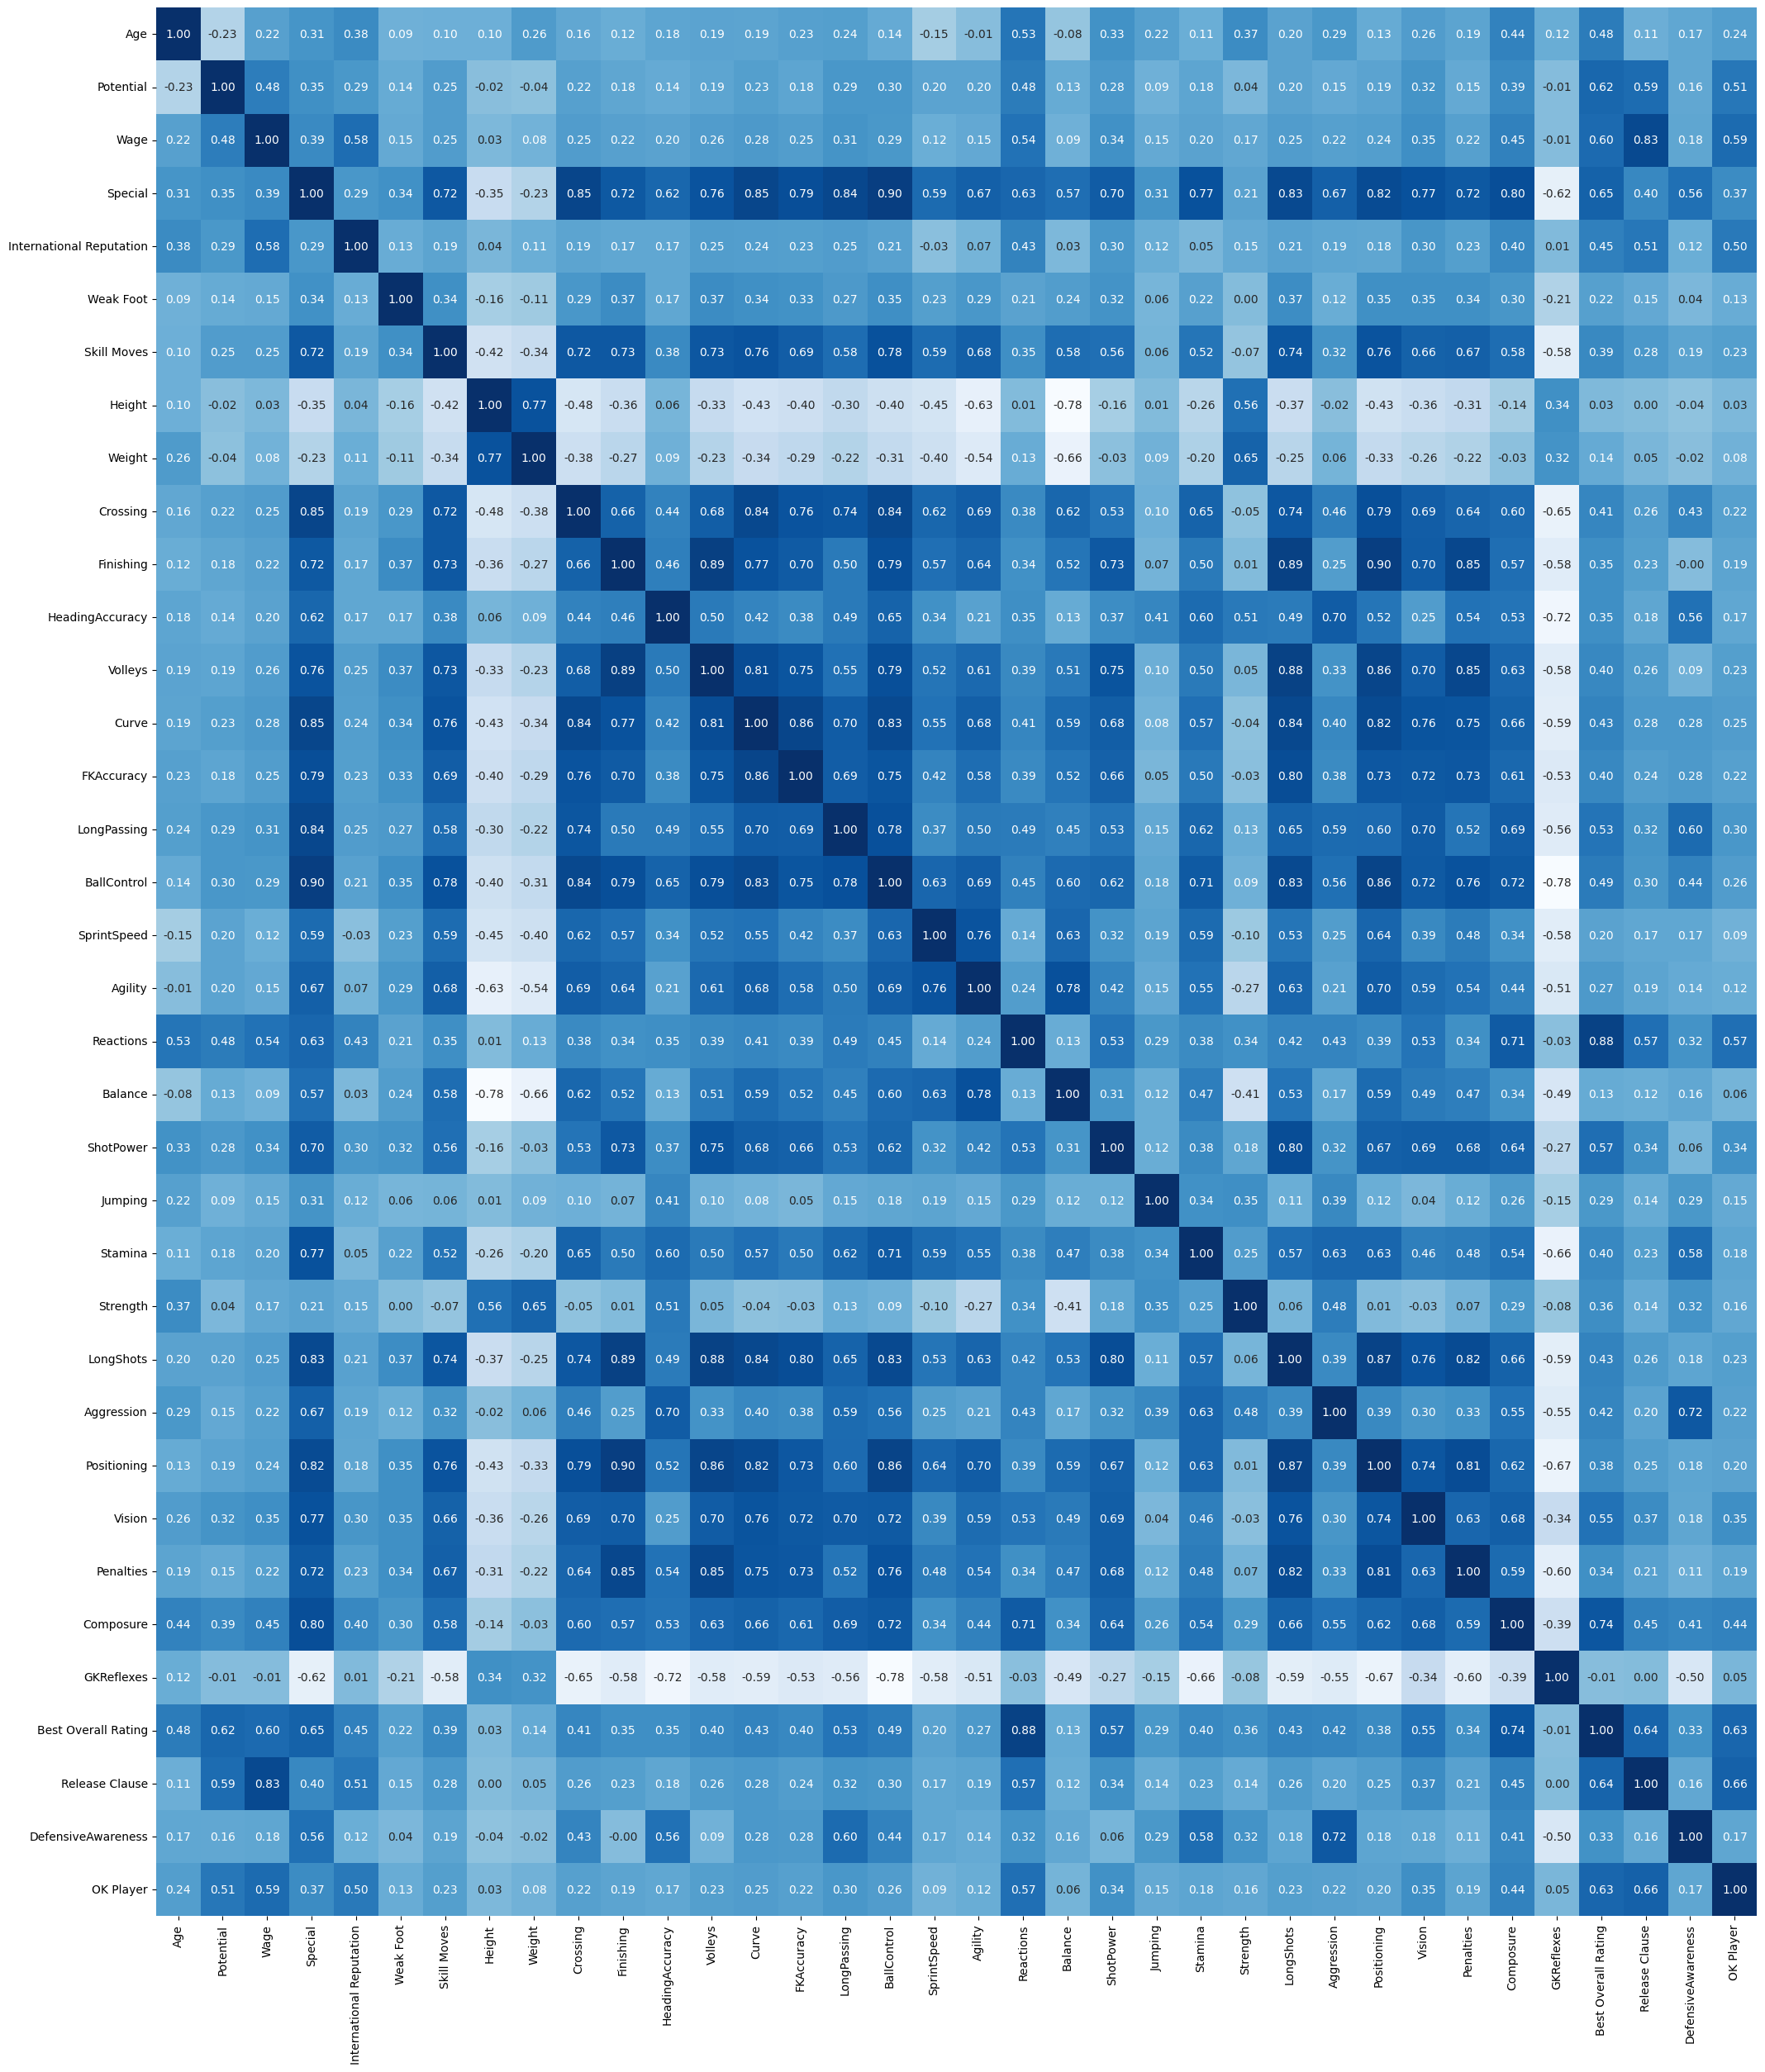

In [347]:
plt.figure(figsize=(25, 30))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False)
plt.show()

Terdapat beberapa feature yang memiliki korelasi yang kecil terhadap target dengan korelasi di bawah 0.2. Feature ini akan di drop karena tidak memiliki pengaruh signifikan terhadap target. Feature-feature tersebut adalah:

- Weak Foot
- Height
- Weight
- Finishing
- HeadingAccuracy
- SprintSpeed
- Agility
- Balance
- Jumping
- Stamina
- Strength
- Penalties
- GKReflexes
- DefensiveAwareness

In [348]:
insignificant_variables = [
    'Weak Foot', 'Height', 'Weight', 'Finishing', 'HeadingAccuracy',
    'SprintSpeed', 'Agility', 'Balance', 'Jumping', 'Stamina',
    'Strength', 'Penalties', 'GKReflexes', 'DefensiveAwareness'
]
df.drop(columns=insignificant_feature, inplace=True)

In [349]:
df.head(3)

,Age,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,LongShots,Aggression,Positioning,Vision,Penalties,Composure,Best Overall Rating,Release Clause,DefensiveAwareness,OK Player
0,33,87,115000.0,2316,5.0,4.0,3.0,80.0,92.0,84.0,...,88.0,87.0,91.0,84.0,83.0,85.0,87.0,64600000.0,57.0,1
1,29,91,370000.0,2304,4.0,5.0,4.0,94.0,82.0,55.0,...,91.0,76.0,88.0,94.0,84.0,91.0,91.0,161000000.0,68.0,1
2,25,90,195000.0,2303,2.0,4.0,4.0,87.0,77.0,58.0,...,89.0,70.0,83.0,90.0,91.0,86.0,88.0,124400000.0,72.0,1


In [350]:
df.columns

Index(['Age', 'Potential', 'Wage', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'SprintSpeed', 'Agility', 'Reactions', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Best Overall Rating',
       'Release Clause', 'DefensiveAwareness', 'OK Player'],
      dtype='object')

In [351]:
ml_features = ['Age', 'Potential', 'Wage', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'SprintSpeed', 'Agility', 'Reactions', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Best Overall Rating',
       'Release Clause', 'DefensiveAwareness', 'OK Player']

In [352]:
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

# Initialize MinMaxScaler for scaling features
scaler = MinMaxScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Concatenate the scaled features with the target variable
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['OK Player'] = target.values

In [353]:
scaled_df.to_csv('preprocessed.csv', index=False)

#### Modeling

In [354]:
features = scaled_df.drop(columns=['OK Player'])
target = scaled_df['OK Player']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [355]:
xgb_model = XGBClassifier()

In [356]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [357]:
# Make predictions using the test set
y_pred = xgb_model.predict(X_test)

In [358]:
# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)

print("Accuracy:", ml_accuracy)
print("F1 Score:", ml_f1_score)

Accuracy: 0.9919495213228895
F1 Score: 0.9700404858299595


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [359]:
# Submit Method

# Do not change the code below
question_id = "01_ml_project_features"
submit(student_id, name, assignment_id, str(ml_features), question_id, drive_link)
question_id = "02_ml_project_accuracy"
submit(student_id, name, assignment_id, str(ml_accuracy), question_id, drive_link)
question_id = "03_ml_project_f1score"
submit(student_id, name, assignment_id, str(ml_f1_score), question_id, drive_link)

'Assignment successfully submitted'

## FIN